In [5]:
import random
import matplotlib.pyplot as plt

In [6]:
# generating data

random.seed(207)

datapoints = []
for x in range(100):
    x1 = random.randrange(-50, 51)
    x2 = random.randrange(-50, 51)
    x3 = random.randrange(-50, 51)
    datapoints.append([x1, x2, x3])
print(len(datapoints))
print(datapoints)

100
[[14, 34, 35], [27, -22, 44], [-30, -47, 36], [-6, -31, 38], [12, -40, -43], [-10, -4, -34], [-27, -42, -9], [22, 8, -25], [-1, 0, -26], [19, -31, -37], [-7, -45, 15], [50, -28, 38], [-38, -7, 47], [35, -18, 13], [33, 46, -34], [-1, -13, -43], [-4, 26, 8], [-3, 30, -4], [-3, 41, -4], [5, 50, -3], [38, 47, 45], [-24, 35, -21], [-19, 15, 46], [15, -14, 17], [14, 24, -10], [-8, 17, 13], [-25, -25, 32], [-30, -48, 25], [-15, 39, 33], [28, -5, -37], [-10, 16, 19], [-40, 12, 34], [5, 32, 38], [36, 20, 7], [30, -42, -14], [-27, -4, -48], [1, -21, 15], [-12, 32, -1], [-2, 0, 20], [45, 32, -9], [-50, -38, -28], [38, -40, 5], [-41, -6, -12], [-24, 22, 9], [10, 15, -31], [-13, -31, 26], [0, 2, -11], [-36, -21, -22], [23, -8, 18], [20, -26, -49], [-35, -27, 48], [37, -28, -14], [15, -28, -20], [-24, 1, -42], [-30, -50, 40], [-44, -12, -25], [-8, 0, -37], [29, -45, 28], [-37, 30, -14], [17, -31, -32], [-4, 24, 48], [33, -23, -19], [-7, 20, 41], [35, 13, 24], [-38, 12, 39], [48, -12, 22], [-28, 

In [7]:
def distance(point1, point2):
    # returns a number which is the Euclidean distance between the two points
    
    # print(point1)
    
    dist = 0
    for x in range(len(point1)):
        dist += pow((point1[x] - point2[x]), 2)
        
    return pow(dist, 0.5)

# print(distance([0, 18], [2, 16]))

In [8]:
class Node:
    def __init__(self, x):
        # constructor used to initalize the single point clusters in AHC
        self.cluster = x
        self.height = 0
        self.leftChild = None
        self.rightChild = None

# print(currentClusters[0].cluster)

In [9]:
def singleLinkage(node1, node2):    
    min_dist = 100000
    for data1 in node1.cluster:
        for data2 in node2.cluster:
            d = distance(data1, data2)
            if d < min_dist:
                min_dist = d
                
    return min_dist
                
def completeLinkage(node1, node2):
    max_dist = -100000
    for data1 in node1.cluster:
        for data2 in node2.cluster:
            d = distance(data1, data2)
            if d > max_dist:
                max_dist = d
    
    return max_dist

def averageLinkage(node1, node2):   
    # print(f"Node1: {node1.cluster}, Node2: {node2.cluster}")
    
    bottom = (len(node1.cluster)) * (len(node2.cluster))
    top = 0
    for data1 in node1.cluster:
        for data2 in node2.cluster:
            # print("data", data1, data2)
            d = distance(data1, data2)
            top += d
    
    return top/bottom
    
    
def centroidLinkage(node1, node2):
    # print(node1.cluster)
    # print(node2.cluster)
    
    centroid1 = [0, 0, 0]
    for x in node1.cluster:
        centroid1[0] += x[0]/len(node1.cluster)
        centroid1[1] += x[1]/len(node1.cluster)
        centroid1[2] += x[2]/len(node1.cluster)
    
    
    centroid2 = [0, 0, 0]
    for x in node2.cluster:
        centroid2[0] += x[0]/len(node2.cluster)
        centroid2[1] += x[1]/len(node2.cluster)
        centroid2[2] += x[2]/len(node2.cluster)
        
    # print(centroid1)
    # print(centroid2)
    
    return distance(centroid1, centroid2)
        


In [10]:
def clustersToMerge(currentClusters, linkage):
    # returns a tuple (i,j,h) which indicates that the i-th and j-th nodes
    # should be merged next to form a new Node with height h
    
    min_link = 100000
    
    # ri is i-th cluster to merge
    # rj is j-th cluster to merge
    ri = 0
    rj = 0
    rheight = 0
    
    for i in range(len(currentClusters)):
        for j in range(i, len(currentClusters)):
            # iterates trough all pairs finding the specified linkage value between them and 
            # updating clusters ri and rj with the pair returning the smallest value
            if i != j:
                # print(i, j)
                if linkage == "single":
                    height = singleLinkage(currentClusters[i], currentClusters[j])
                elif linkage == "complete":
                    height = completeLinkage(currentClusters[i], currentClusters[j])
                elif linkage == "average":
                    height = averageLinkage(currentClusters[i], currentClusters[j])
                elif linkage == "centroid":
                    height = centroidLinkage(currentClusters[i], currentClusters[j])
                # print(f"height: {height}")
                # print(f"link: {min_link}")
                if height < min_link:
                    min_link = height
                    ri = i
                    rj = j
                    rheight = height
                    
    # print(f"MERGED: {ri, rj} @ HEIGHT {rheight}")
                    
    return (ri, rj, rheight)

    

In [19]:
def ahc(datapoints, linkage):
    # returns the root node of the AHC tree
    
    #currentClusters = []
    # for x in datapoints:
        # currentClusters.append(Node([x]))
    
    # testing
    currentClusters = []
    # slides = [[1, 4], [6, 4], [0, 3], [1, 3], [5, 6], [5, 1], [6, 2]]
    # quiz = [[6, 5], [4, 6], [1, 1], [5, 4], [2, 1], [3, 5], [7, 4], [1, 3]]
    for x in datapoints:
        currentClusters.append(Node([x]))
    
    root = None
    
    while len(currentClusters) > 1:
        
        # for x in currentClusters:
        #     print(x.cluster)
        
        # selecting clusters and height to merge at
        i, j, height = clustersToMerge(currentClusters, linkage)
        # print(i, j)
        # print("left for parent = ", currentClusters[i].cluster)
        
        # creates new parent cluster node as the combination of the two returned clusters above
        # updates the height and sets its children to the clusters that formed it to maintain tree structure
        parent = Node(currentClusters[i].cluster + currentClusters[j].cluster)
        parent.height += height
        parent.leftChild = currentClusters[i]
        parent.rightChild = currentClusters[j]
        
        # print(f"parent: {parent.cluster}")
        
        # print(currentClusters, len(currentClusters))
        # print(currentClusters[i].cluster, currentClusters[j].cluster)
        
        # creates new list of all datapoints excluding individual nodes from new combined node 
        # and appending at each iteration the new combined parent node
        # reduces itself to one final node as the root node
        newClusters = []
        for x in range(len(currentClusters)):
            if x == i or x == j:
                pass
            else:
                newClusters.append(currentClusters[x])
        # print("new before parent: ", len(newClusters))
        newClusters.append(parent)
        currentClusters = newClusters
        
        root = parent
        # print("p", parent.cluster)
    
    return root
    
# r = ahc(datapoints[:5], "average")
# print(r.height)


Height: 31.622776601683793
Graph generated via linkage function: single


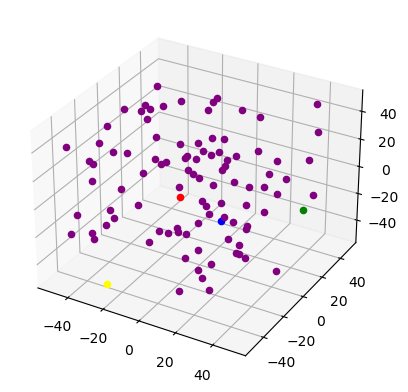

Height: 146.47184029703456
Graph generated via linkage function: complete


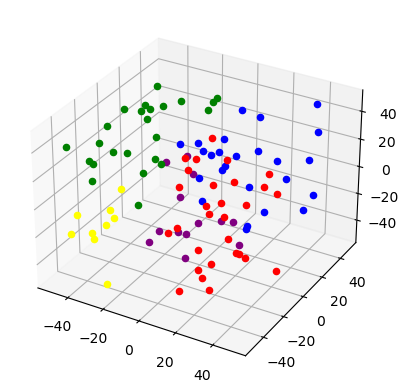

Height: 76.42056065786215
Graph generated via linkage function: average


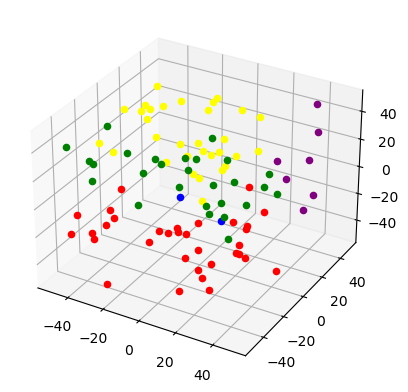

Height: 71.44354799259992
Graph generated via linkage function: centroid


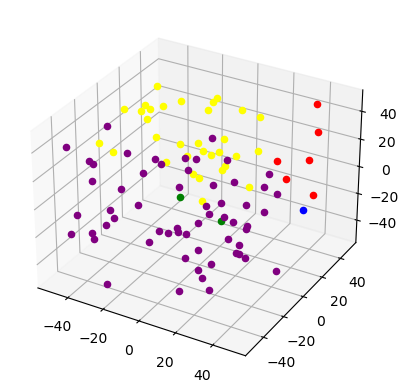

In [20]:
# taken from https://www.geeksforgeeks.org/python-sort-list-according-second-element-sublist/
# used to sort clusters in order of height so that the higher clusters are split first
# needed as if cluster branch has less splits but another branch has a split with greater height
# branch with fewer splits will be split first
# changed to sort in order of decreasing elements to get highest node first
def Sort(points):
    l = len(points)
    for i in range(0, l):
        for j in range(0, l-i-1):
            if (points[j][1] < points[j + 1][1]):
                tmp = points[j]
                points[j]= points[j + 1]
                points[j + 1]= tmp
    return points


def cutTree(rootNode, k):
    # returns list of the k clusters obtained by cutting the AHC tree at appropriate height
    
    out = [[rootNode, rootNode.height]]
    i = 0
    
    # while number of nodes in out less than cut parameter k, keep exapnding clusters and adding child clusters to out
    while len(out) < k:
        out = Sort(out)

        val = out[i][0]
        if val.leftChild == None:
            i += 1
        cur = out.pop(i)
        
        left = cur[0].leftChild
        right = cur[0].rightChild
            
        out.append([left, left.height])
        out.append([right, right.height])
             
    return out

# creating plots

linkage_funcs = ["single", "complete", "average", "centroid"]

for linkage in linkage_funcs:
    r = ahc(datapoints, linkage)
    print(f"Height: {r.height}")
    print(f"Graph generated via linkage function: {linkage}")

    clust = cutTree(r, 5)
    # print(clust)

    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    colours = ["red", "green", "blue", "yellow", "purple"]
    for x in range(len(clust)):
        cluster = clust[x][0].cluster

        for data in cluster:
            ax.scatter(data[0], data[1], data[2], color= colours[x])

    plt.show()